In [17]:
import json

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader

from dataset import FashionMNIST, load_data
from inference import load_model, inference

In [18]:
# Configuration
with open("../config.json", "r") as f:
    cfg = json.load(f)

# Load test data
_, _, X_test, _, _, y_test = load_data(
    train_path=f"../{cfg['train_path']}", test_path=f"../{cfg['test_path']}", debug=cfg["debug"]
)

# Dataset and dataloader
test_dataset = FashionMNIST(X=X_test, y=y_test)
test_loader = DataLoader(
    dataset=test_dataset, batch_size=cfg["batch_size"], shuffle=False
)

In [19]:
# Load trained model
model = load_model(f"../models/{cfg['save_model_name']}.pt")
model

ConvNet(
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=6272, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
  (drop): Dropout(p=0.25, inplace=False)
)

In [20]:
# Classes
classes = [
    "0 T-shirt/top",
    "1 Trouser",
    "2 Pullover",
    "3 Dress",
    "4 Coat",
    "5 Sandal",
    "6 Shirt",
    "7 Sneaker",
    "8 Bag",
    "9 Ankle boot",
]

# Initialise
n_correct=0
n_samples=0

n_class_correct = [0 for i in range(10)]
n_class_sample = [0 for i in range(10)]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for imgs, labels in test_loader:
    # Made predictions
    preds = inference(model, imgs)

    # Measure accuracy
    n_samples += labels.shape[0]
    n_correct += (preds == labels).sum().item()
    
    for i in range(cfg["batch_size"]):
        try:
            label = labels[i].item()
            pred = preds[i].item()
        except:
            break
        
        if (label==pred):
            n_class_correct[label]+=1
        n_class_sample[label]+=1

acc = 100 * n_correct/n_samples
print(f'Overall accuracy on test set: {acc:.1f} %\n')

for i in range(10):
    print(f'Accuracy of {classes[i]}: {100* n_class_correct[i]/n_class_sample[i]:.1f} %')

Overall accuracy on test set: 59.0 %

Accuracy of 0 T-shirt/top: 56.5 %
Accuracy of 1 Trouser: 88.2 %
Accuracy of 2 Pullover: 20.0 %
Accuracy of 3 Dress: 88.0 %
Accuracy of 4 Coat: 58.6 %
Accuracy of 5 Sandal: 62.5 %
Accuracy of 6 Shirt: 0.0 %
Accuracy of 7 Sneaker: 100.0 %
Accuracy of 8 Bag: 61.5 %
Accuracy of 9 Ankle boot: 57.9 %


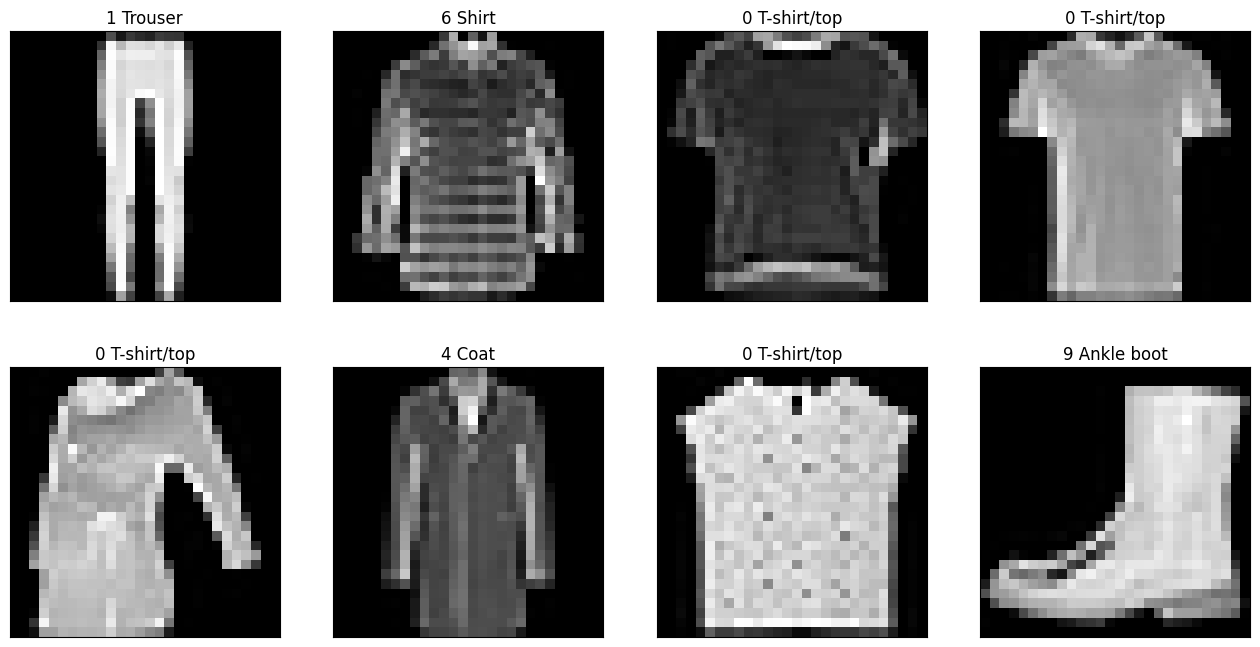

In [21]:
# Figure size
plt.figure(figsize=(16,8))

# Subplot
for i in range(8):
    img = np.asarray(imgs[i,0,:,:])
    ax=plt.subplot(2, 4, i+1)
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.title.set_text(f'{classes[labels[i]]}')
    plt.imshow(img, cmap='gray')
    
plt.show()